# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [2]:
df = pd.read_csv("StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [5]:
df.describe(include="O")

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
df[df["Teacher_Quality"].isnull()]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
127,17,97,Medium,Medium,No,8,89,Medium,Yes,1,Low,NaN,Public,Neutral,4,No,High School,Far,Male,69
396,10,80,High,Medium,Yes,6,93,High,Yes,4,Medium,NaN,Public,Negative,3,No,College,Moderate,Female,67
457,14,86,Medium,Low,Yes,8,90,Medium,No,3,Medium,NaN,Public,Negative,3,Yes,Postgraduate,Near,Male,65
570,20,71,High,Medium,No,8,77,Medium,Yes,0,High,NaN,Private,Neutral,4,No,High School,Moderate,Male,66
593,22,82,High,Medium,Yes,7,71,Low,Yes,1,High,NaN,Private,Positive,3,No,High School,Near,Female,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6414,22,63,Low,Low,Yes,7,94,Medium,Yes,0,Medium,NaN,Public,Negative,3,Yes,High School,Far,Male,61
6427,29,75,Low,Medium,Yes,7,96,Low,Yes,2,Low,NaN,Public,Positive,3,No,High School,Moderate,Male,68
6461,12,89,Medium,High,Yes,8,78,Low,Yes,4,Low,NaN,Public,Neutral,5,No,Postgraduate,Near,Female,69
6579,9,84,Medium,Medium,No,6,74,Medium,Yes,5,High,NaN,Public,Neutral,2,No,High School,Near,Male,67


# Missing Value Handling

In [9]:
df['Teacher_Quality'].fillna(df['Teacher_Quality'].mode()[0], inplace=True)
df['Parental_Education_Level'].fillna(df['Parental_Education_Level'].mode()[0], inplace=True)
df['Distance_from_Home'].fillna(df['Distance_from_Home'].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

# Visualization 

## Numerical Features

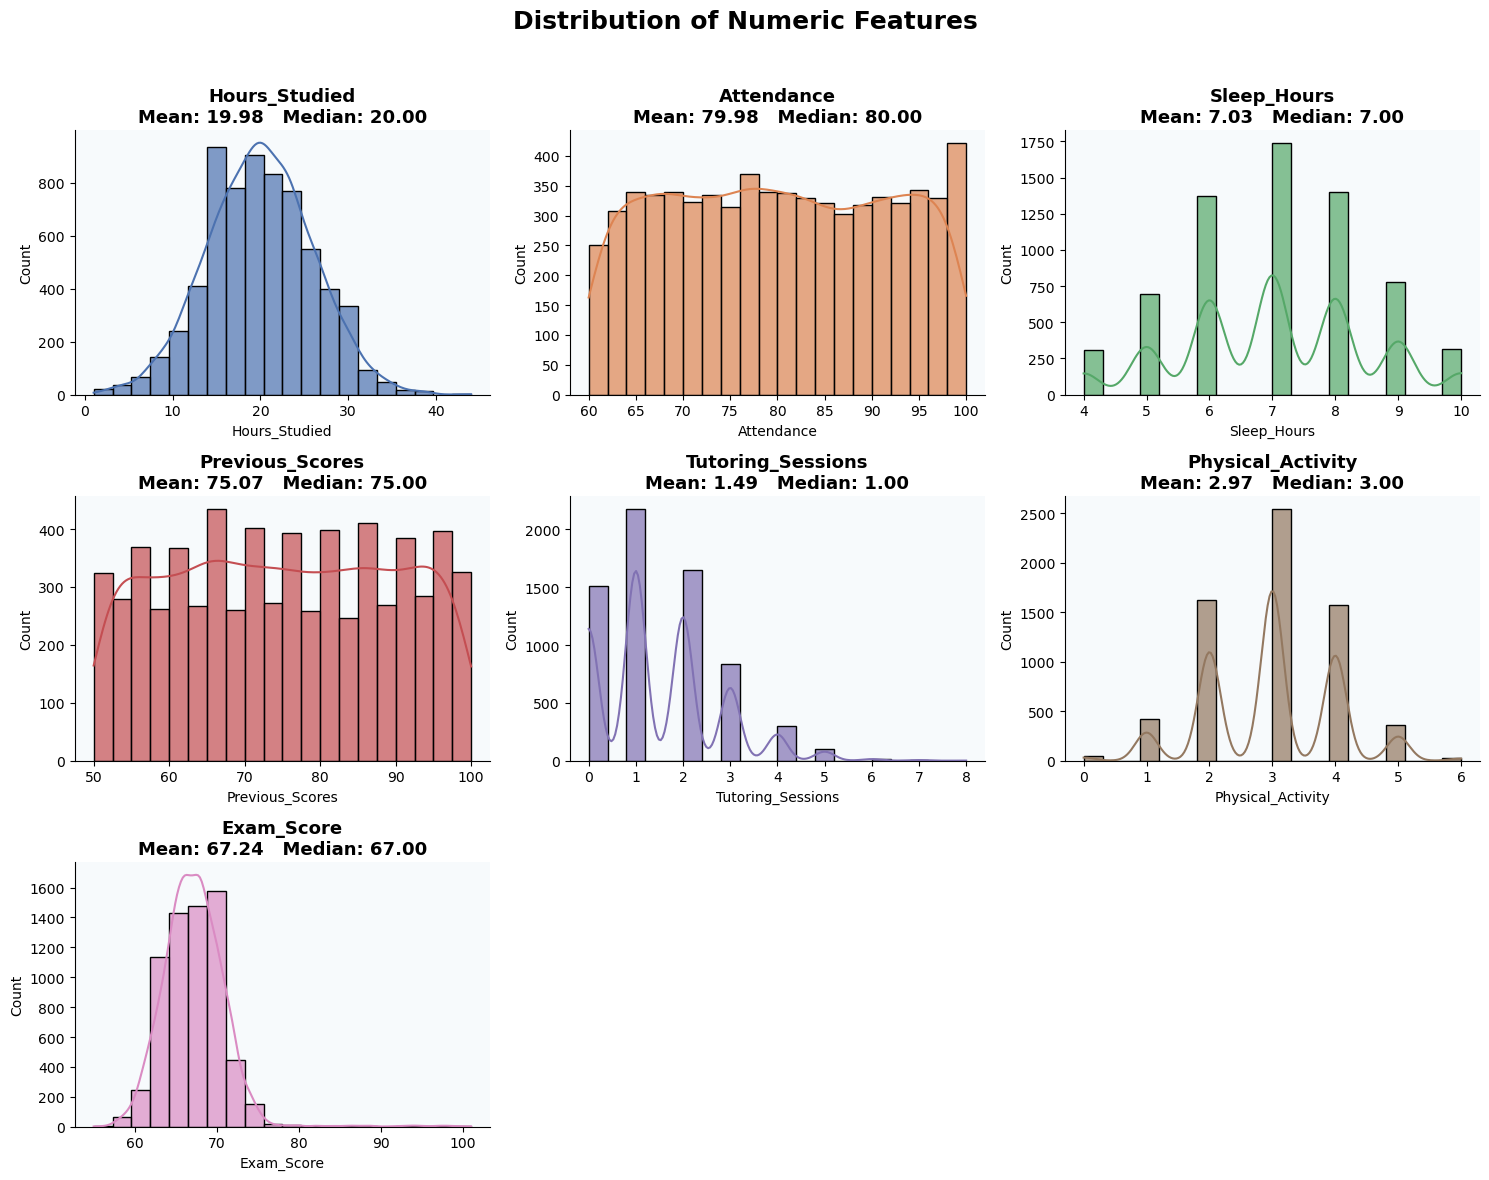

In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_vars = len(numeric_cols)
ncols = 3
nrows = int(np.ceil(num_vars / ncols))

palette = sns.color_palette('deep', num_vars)
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 4))
axes = axes.flatten()

for i, (col, color) in enumerate(zip(numeric_cols, palette)):
    ax = axes[i]
    sns.histplot(df[col], bins=20, kde=True, color=color, ax=ax, edgecolor='black', alpha=0.7)
    mean = df[col].mean()
    median = df[col].median()
    ax.set_title(f"{col}\nMean: {mean:.2f}   Median: {median:.2f}", fontsize=13, fontweight='semibold')
    ax.set_facecolor('#f7fafc')
    sns.despine(ax=ax)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Distribution of Numeric Features', fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


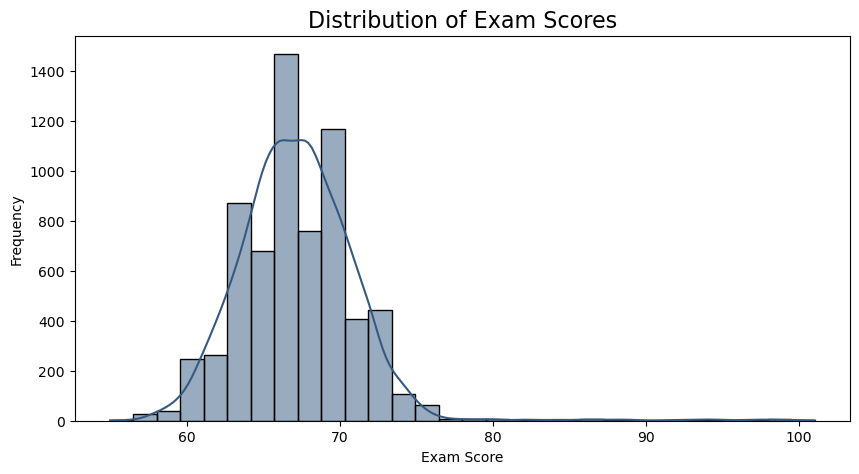

In [12]:
# Target distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Exam_Score'], kde=True, bins=30, color='#355a81')
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

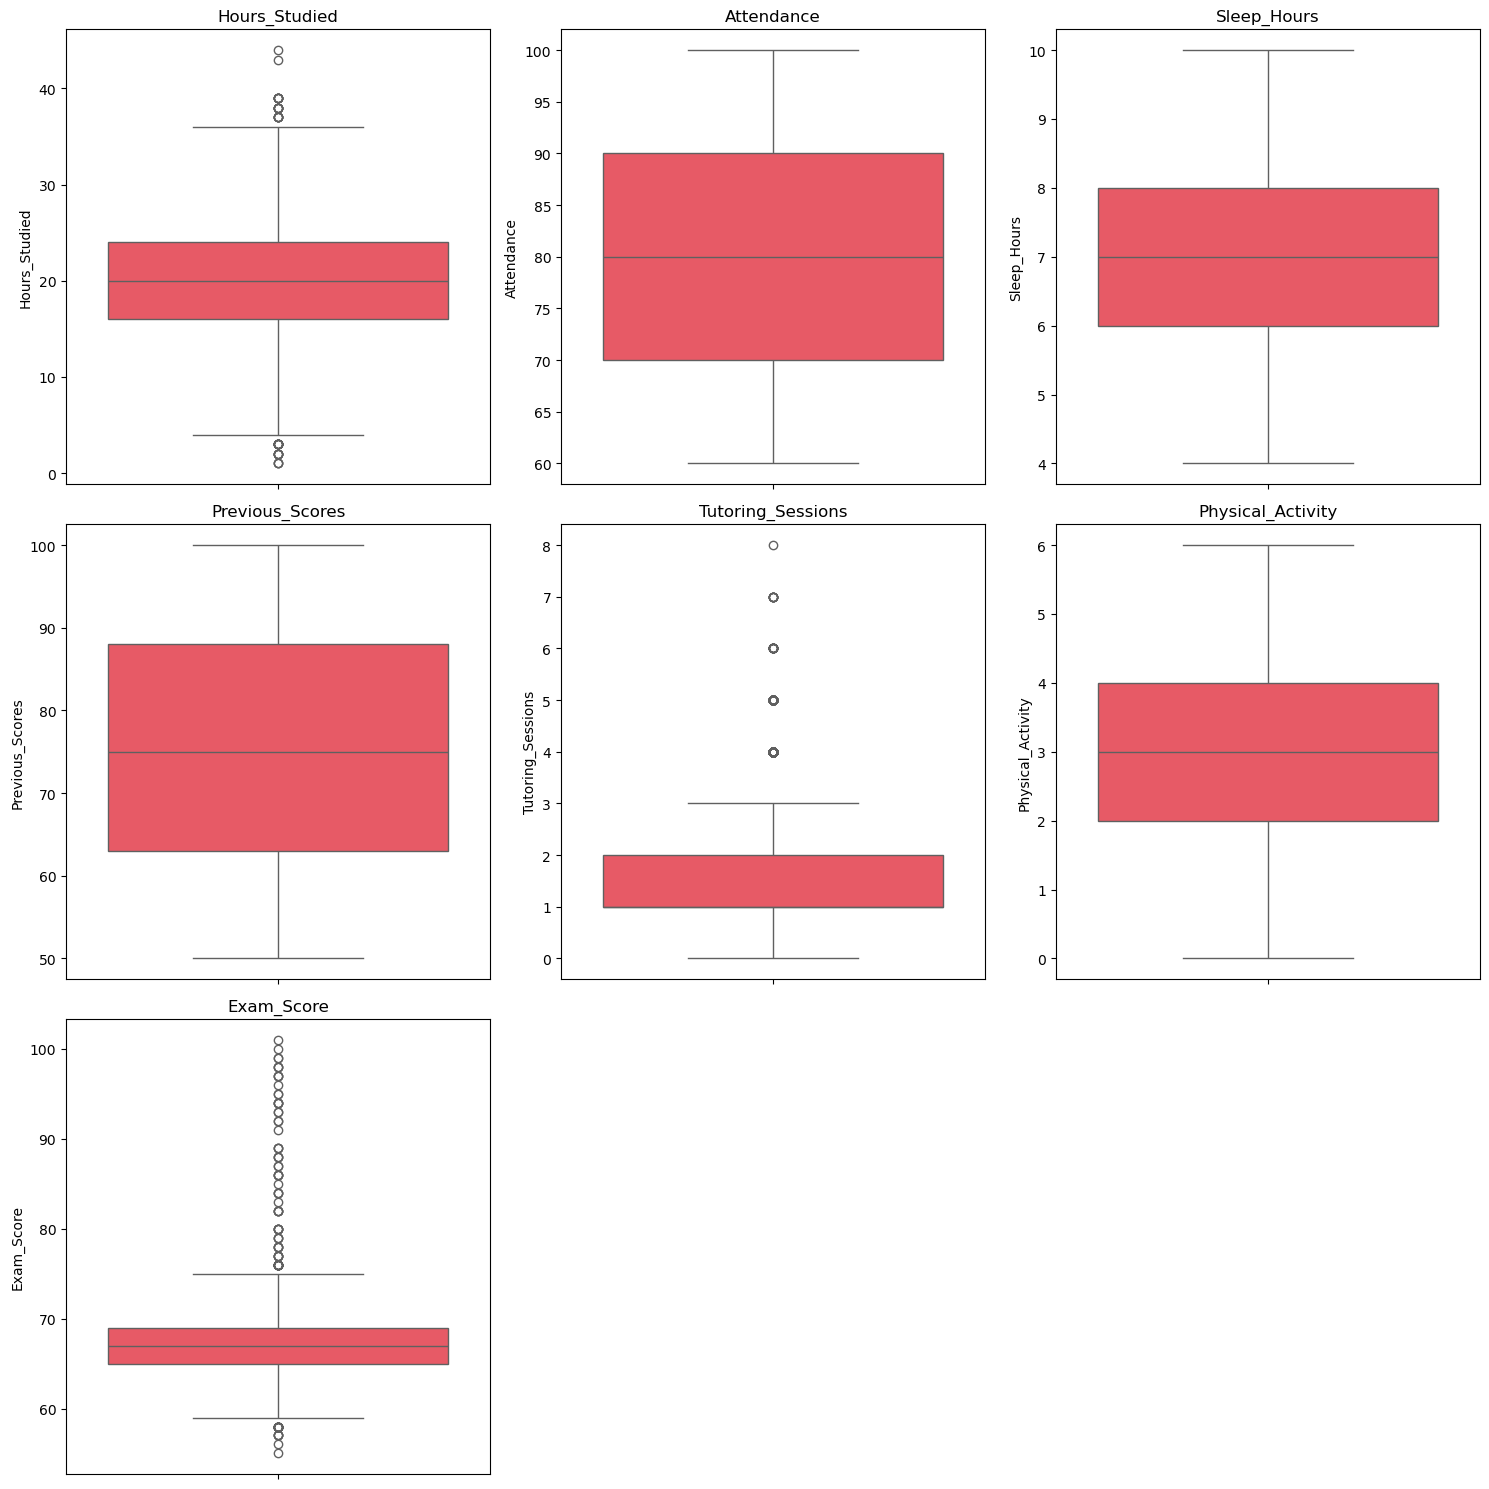

In [13]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df[col],color="#ff4252")
    plt.title(col)
plt.tight_layout()
plt.show()

## Handling Outliers

In [14]:
# Function to show only outlier values for each column
def show_outlier_values(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        
        print(f"\nColumn: {col}")
        print(f"Number of outliers: {outliers.shape[0]}")
        print("Outlier values:")
        print(outliers.values)  # show outlier values
        print("-"*50)
# Columns to check
columns_to_check = ['Exam_Score', 'Hours_Studied', 'Tutoring_Sessions']

# Show only outlier values
show_outlier_values(df, columns_to_check)


Column: Exam_Score
Number of outliers: 104
Outlier values:
[100  76  79  78  89  86  97  83  84  80  58  94  94  97  80  55  89  92
  76  58  82  76  77 101  88  77  58  89  80  79  76  84  76  76  91  76
  86  99  88  58  78  77  58  87  87  57  88  58  82  94  86  76  76  58
  86  58  96  58  76  57  99  58  76  78  58  82  84  58  76  98  78  80
  95  85  94  58  58  93  93  58  58  82  76  77  58  92  76  79  58  56
  58  57  58  57  97  80  58  76  77  98  98  58  95  76]
--------------------------------------------------

Column: Hours_Studied
Number of outliers: 43
Outlier values:
[43  1 38  3  3  3  2 39 39  2  2 37 39 38 38 44  2  3  3 37  2 39 39  3
 37  2  3  3  3  3  1  1 37 38 39 38 38  3 37 39 38  3 37]
--------------------------------------------------

Column: Tutoring_Sessions
Number of outliers: 430
Outlier values:
[4 4 5 4 4 4 5 5 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 4 4 4 5 4 4 4 5 4 4 4 4
 4 5 4 4 6 5 4 4 4 6 5 5 4 4 4 4 4 4 5 5 4 4 4 4 4 4 4 5 4 4 4 4 4 4 4 5 4
 4 5

In [15]:
def cap_outliers_iqr(df, column, verbose=True):
    n_rows = len(df)
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers_before = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    pct_before = outliers_before / n_rows * 100

    df[column] = df[column].clip(lower_bound, upper_bound)

    outliers_after = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    pct_after = outliers_after / n_rows * 100

    if verbose:
        print(f"\nColumn: {column}")
        print(f"  Outliers before: {outliers_before} ({pct_before:.2f}%)")
        print(f"  Outliers after : {outliers_after} ({pct_after:.2f}%)")
    
    return df


In [16]:
# Apply to numeric features
numeric_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity',
    'Exam_Score'
]

# Work on a clean copy
df_clean = df.copy()

for col in numeric_features:
    if col in df_clean.columns:
        df_clean = cap_outliers_iqr(df_clean, col)
    else:
        print(f"Warning: Column {col} not in DataFrame.")


Column: Hours_Studied
  Outliers before: 43 (0.65%)
  Outliers after : 0 (0.00%)

Column: Attendance
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Sleep_Hours
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Previous_Scores
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Tutoring_Sessions
  Outliers before: 430 (6.51%)
  Outliers after : 0 (0.00%)

Column: Physical_Activity
  Outliers before: 0 (0.00%)
  Outliers after : 0 (0.00%)

Column: Exam_Score
  Outliers before: 104 (1.57%)
  Outliers after : 0 (0.00%)


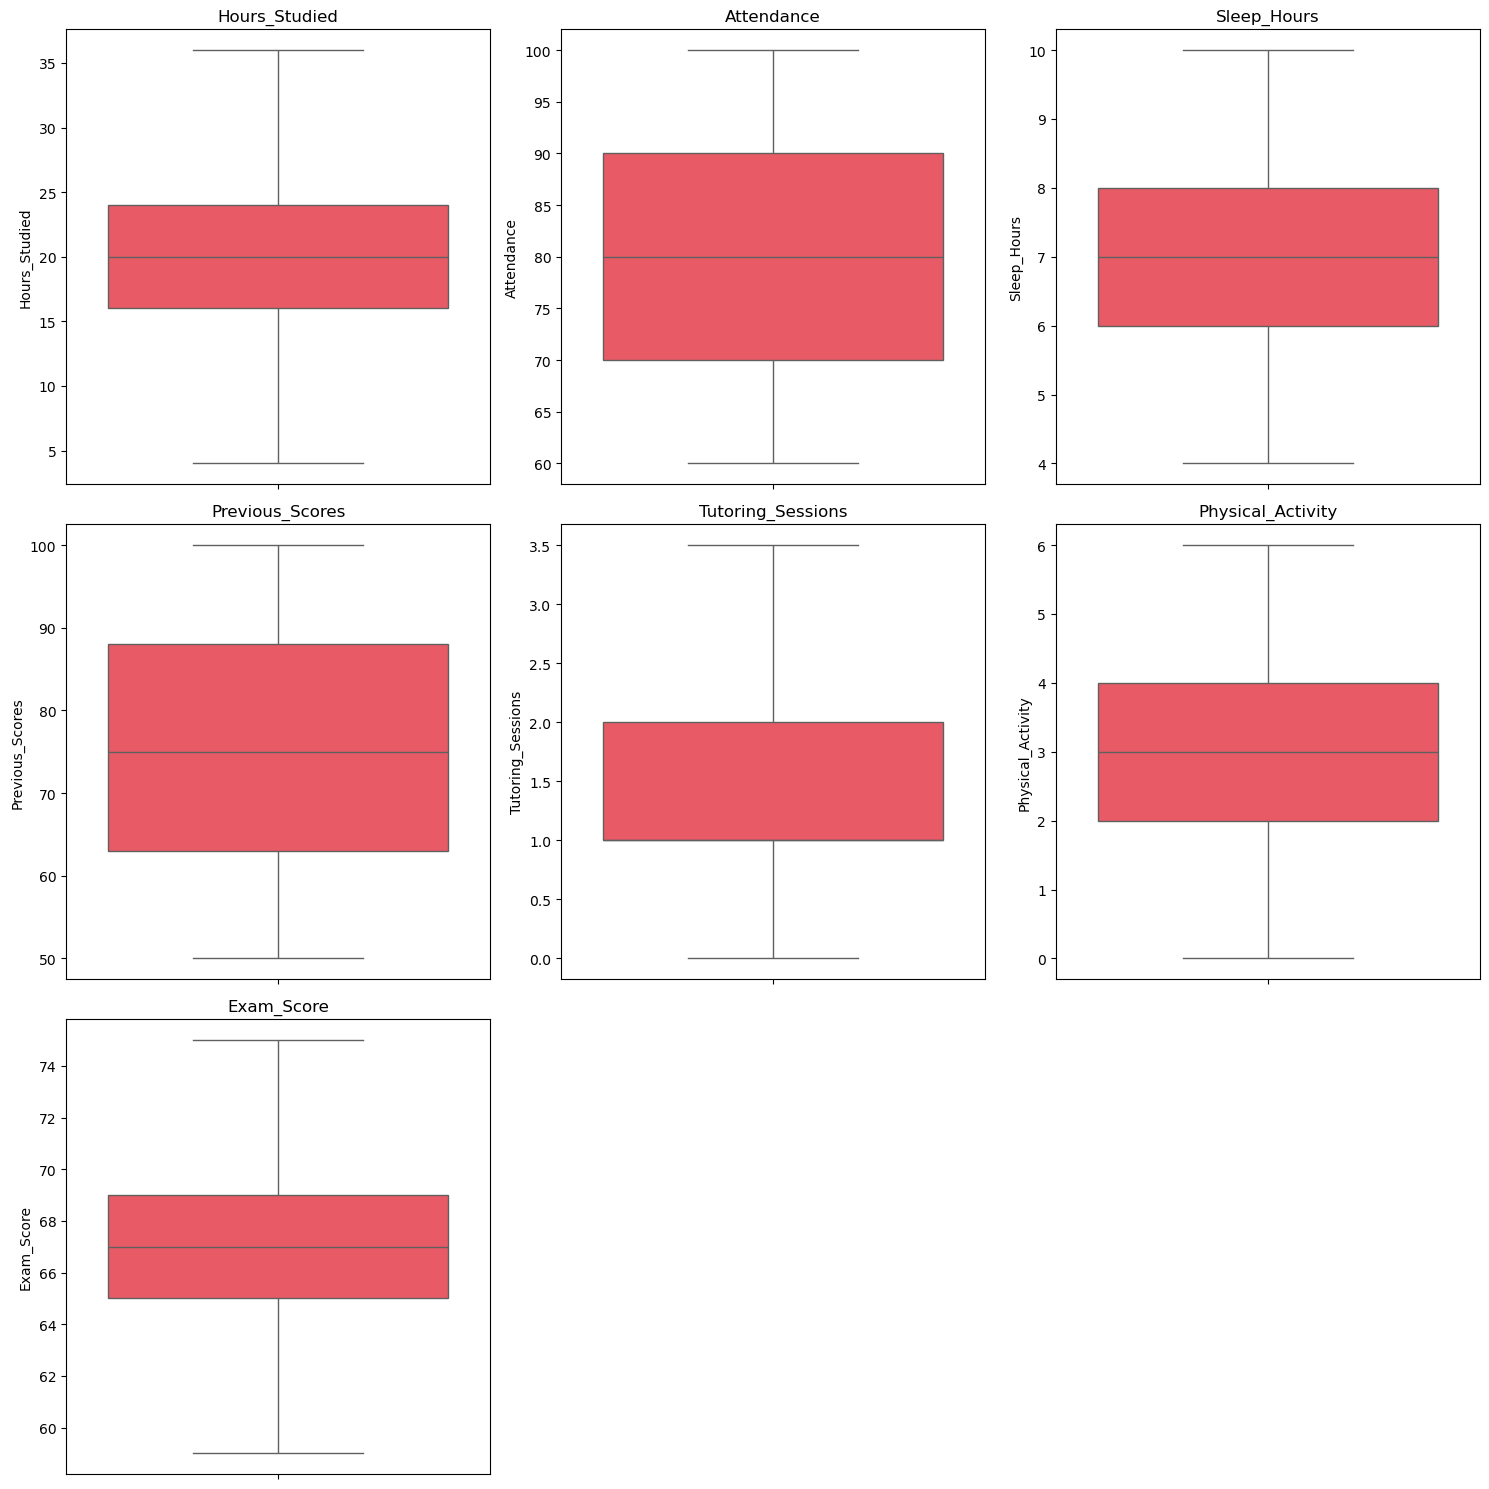

In [17]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(df_clean[col],color="#ff4252")
    plt.title(col)

plt.tight_layout()
plt.show()

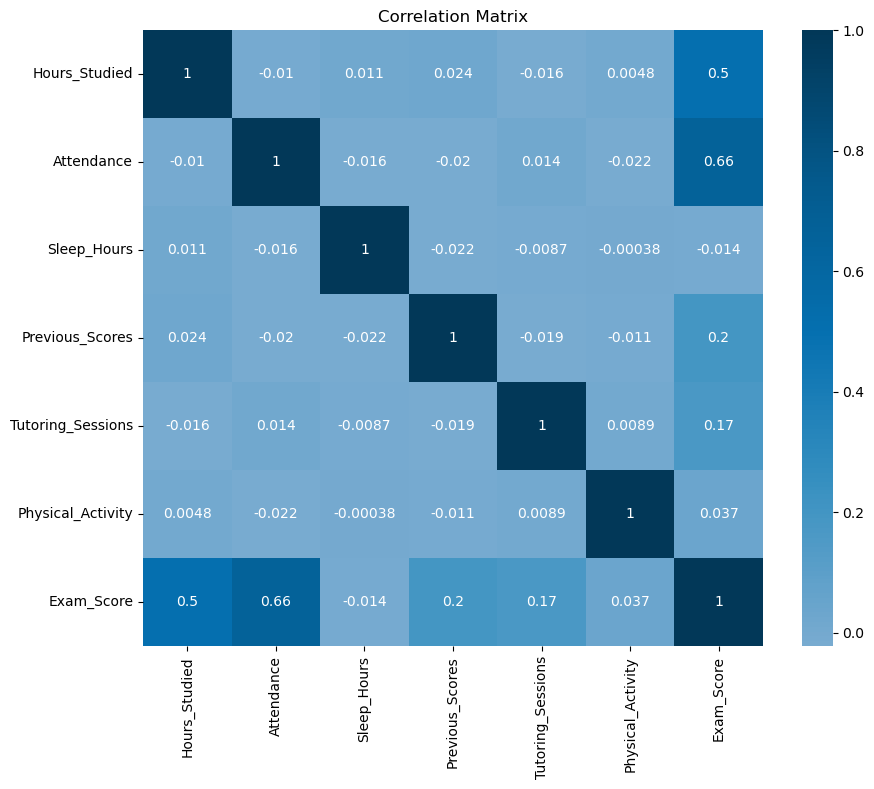

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', center=0)
plt.title('Correlation Matrix')
plt.show()

# Categorical Feature

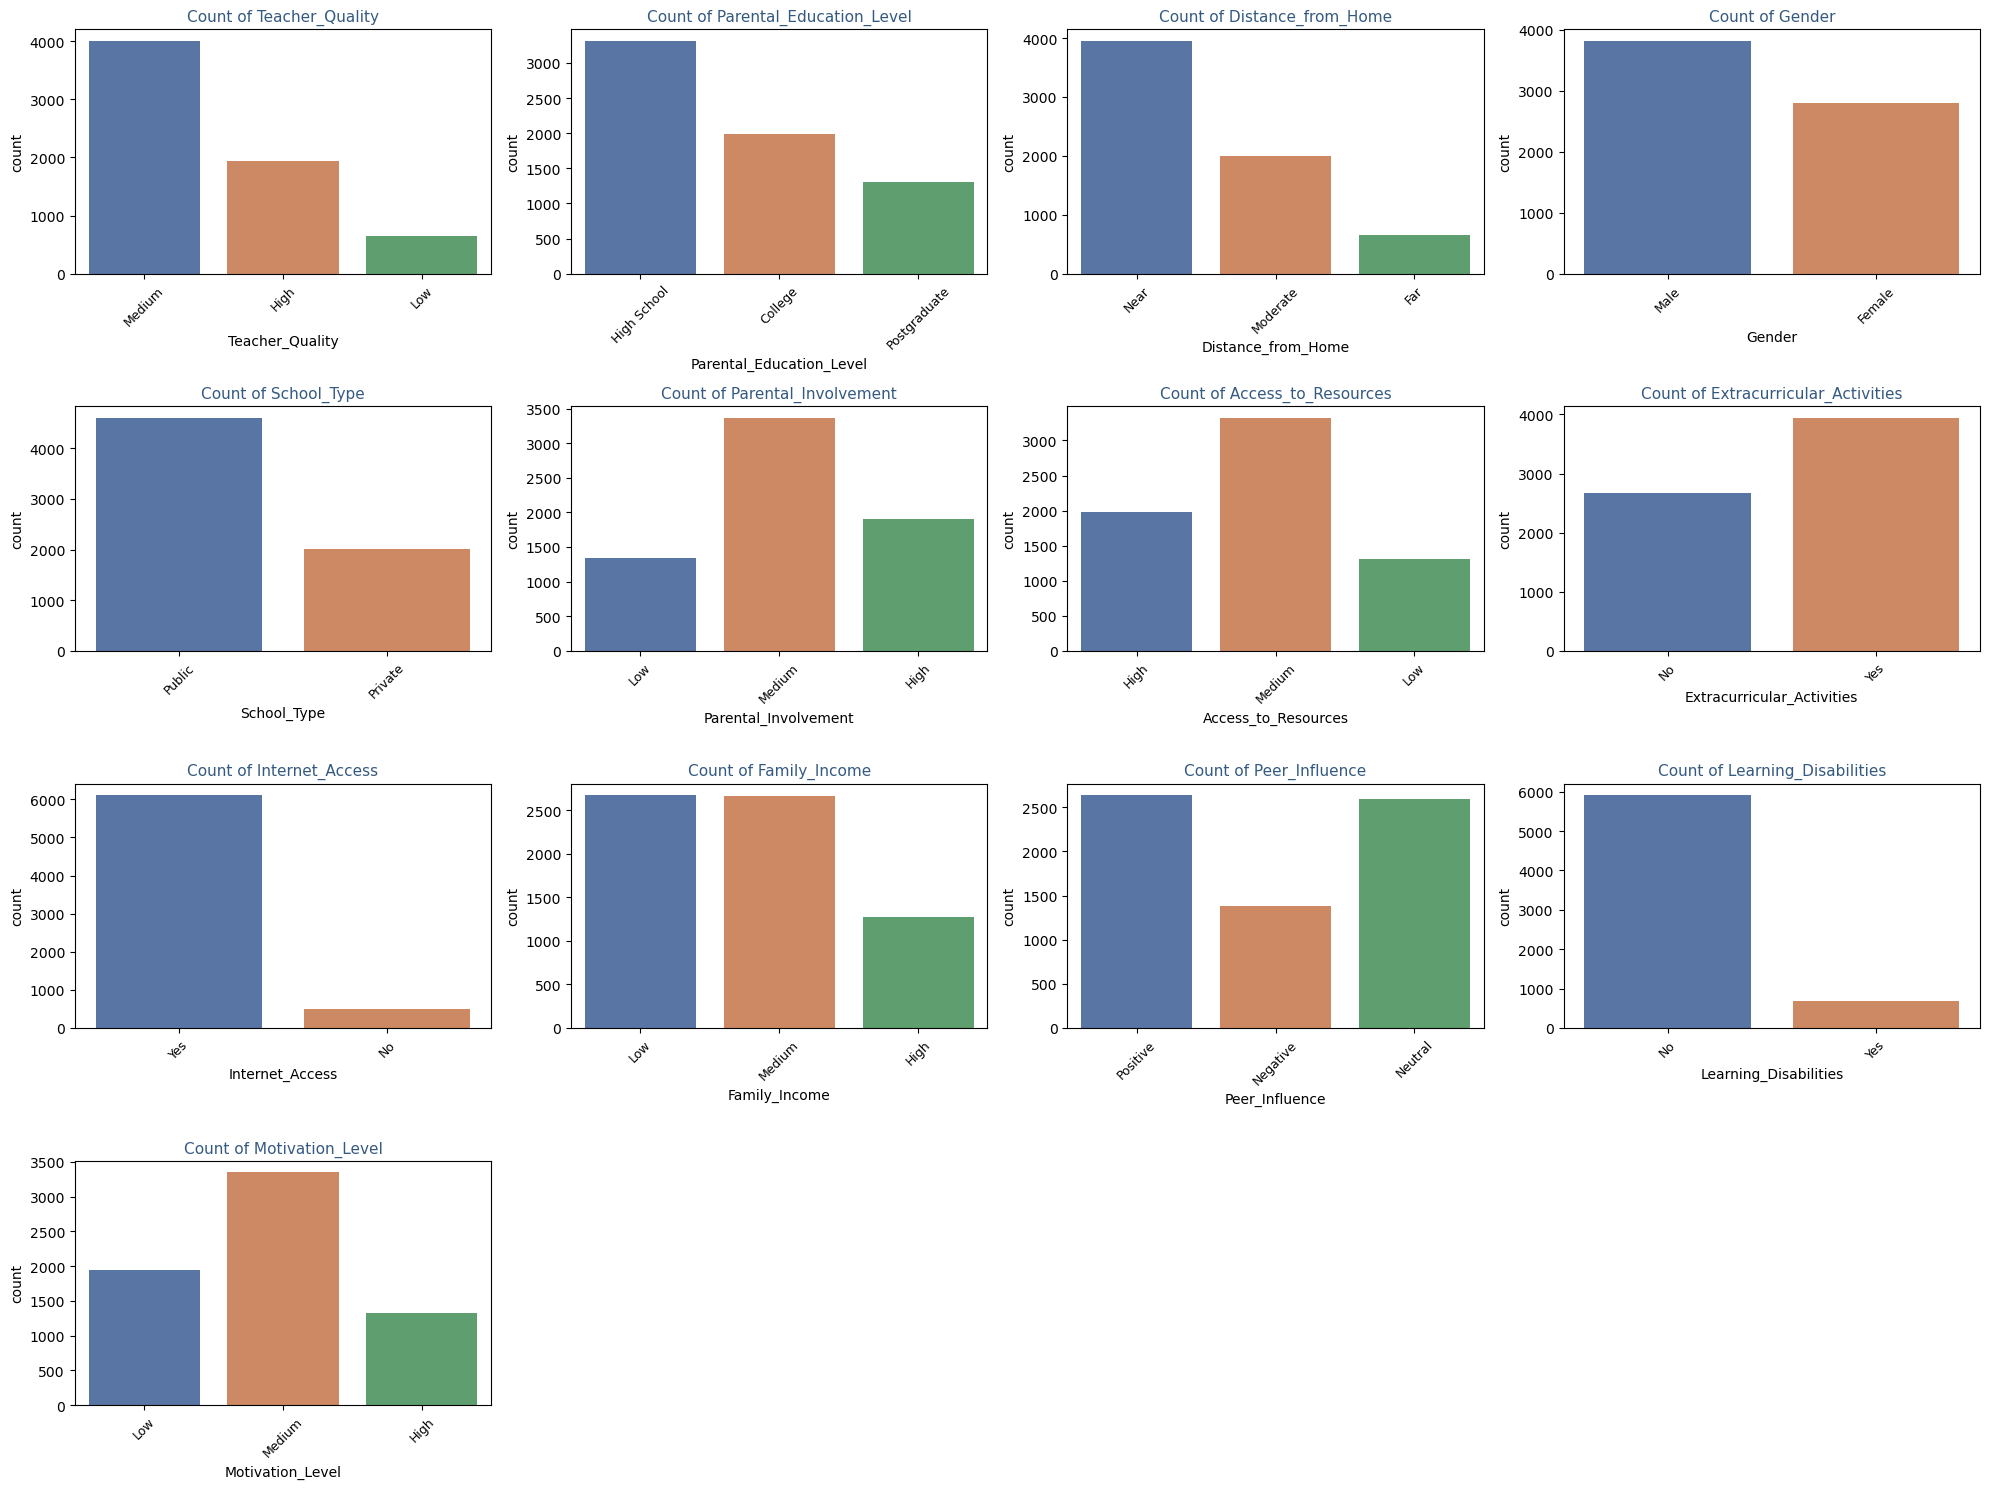

In [19]:
categorical_cols = [
    'Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home',
    'Gender', 'School_Type', 'Parental_Involvement', 'Access_to_Resources',
    'Extracurricular_Activities', 'Internet_Access', 'Family_Income',
    'Peer_Influence', 'Learning_Disabilities', 'Motivation_Level'
]


plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(x=col, data=df_clean, palette="deep")
    plt.xticks(rotation=45, fontsize=9)
    plt.title(f'Count of {col}', color='#355a81', fontsize=11)
plt.tight_layout()
plt.show()

# Encoding 

## Use LabelEncoder for ordinal categories

In [20]:
df_encoded = df_clean.copy()
ordinal_cols = ['Parental_Education_Level', 'Motivation_Level', 'Teacher_Quality']
le = LabelEncoder()
for col in ordinal_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [21]:
##  Manual mapping for remaining ordinal columns

In [22]:
# --- ONE CLEAN BLOCK: ALL ORDINAL ENCODING ---
ordinal_map = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources':  {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income':        {'Low': 0, 'Medium': 1, 'High': 2},
    'Distance_from_Home':   {'Far': 0, 'Moderate': 1, 'Near': 2},
    'Peer_Influence':       {'Negative': -1, 'Neutral': 0, 'Positive': 1}
}
for col, mapping in ordinal_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)

## Use OneHotEncoder for nominal categories

In [23]:
# ONE-HOT ENCODE ONLY NOMINAL COLUMNS
nominal_cols = [
    'School_Type', 'Gender', 'Internet_Access',
    'Extracurricular_Activities', 'Learning_Disabilities'
]

# Filter only existing columns
nominal_cols_existing = [col for col in nominal_cols if col in df_encoded.columns]

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=nominal_cols, drop_first=True, dtype=int)


In [24]:
df_encoded

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,School_Type_Public,Gender_Male,Internet_Access_Yes,Extracurricular_Activities_Yes,Learning_Disabilities_Yes
0,23,84,0,2,7,73,1,0.0,0,2,1,3,1,2,67,1,1,1,0,0
1,19,64,0,1,8,59,1,2.0,1,2,-1,4,0,1,61,1,0,1,0,0
2,24,98,1,1,7,91,2,2.0,1,2,0,4,2,2,74,1,1,1,1,0
3,29,89,0,1,8,98,2,1.0,1,2,-1,4,1,1,71,1,1,1,1,0
4,19,92,1,1,6,65,2,3.0,1,0,0,4,0,2,70,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,7,76,2,1.0,2,2,1,2,1,2,68,1,0,1,0,0
6603,23,76,2,1,8,81,2,3.0,0,0,1,2,1,2,69,1,0,1,0,0
6604,20,90,1,0,6,65,1,3.0,0,2,-1,2,2,2,68,1,0,1,1,0
6605,10,86,2,2,6,91,0,2.0,0,2,1,3,1,0,68,0,0,1,1,0


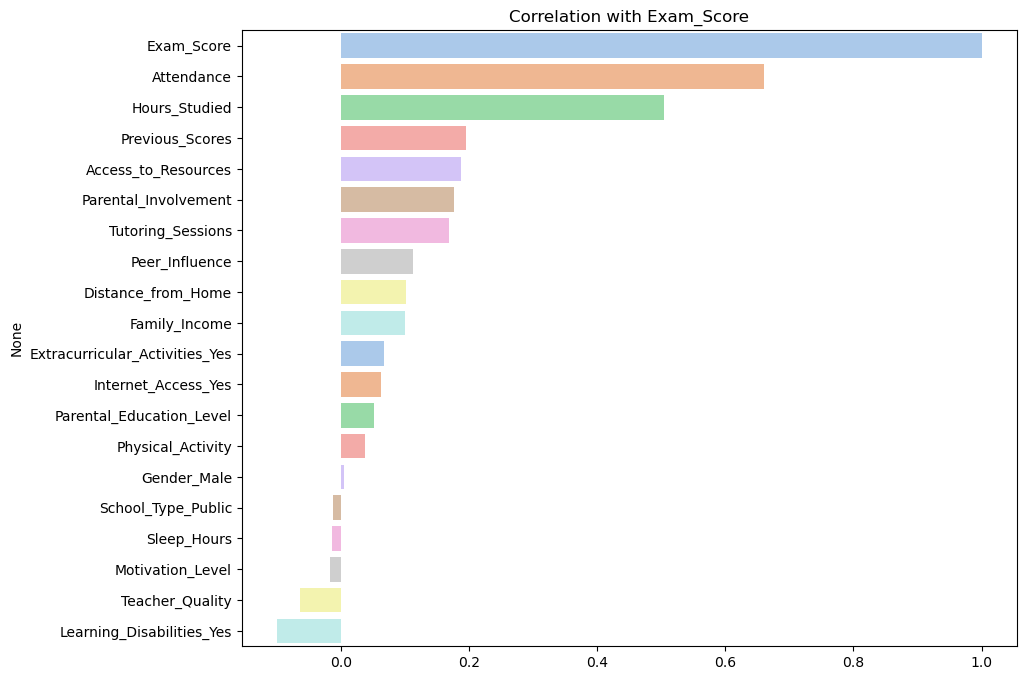

In [25]:
corr_target = df_encoded.corr()['Exam_Score'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='pastel')
plt.title("Correlation with Exam_Score")
plt.show()

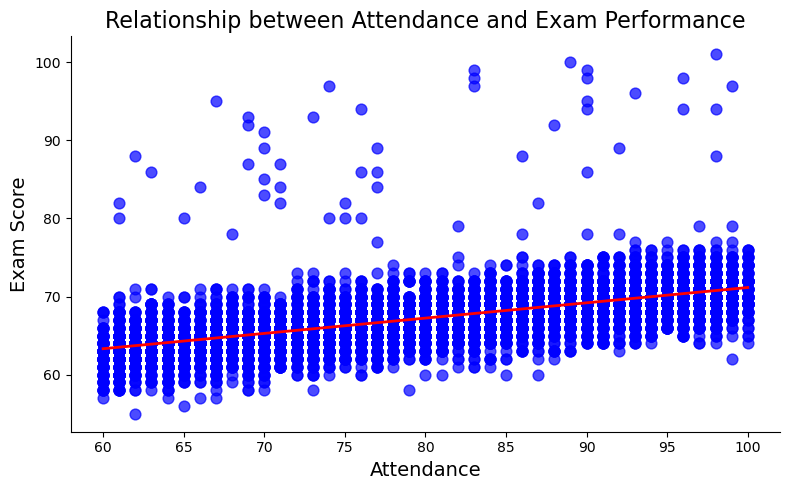

In [26]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Attendance', y='Exam_Score', data=df,scatter_kws={'s': 60, 'color': 'blue', 'alpha': 0.7},line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel('Attendance', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.title('Relationship between Attendance and Exam Performance', fontsize=16)
sns.despine()
plt.tight_layout()
plt.show()

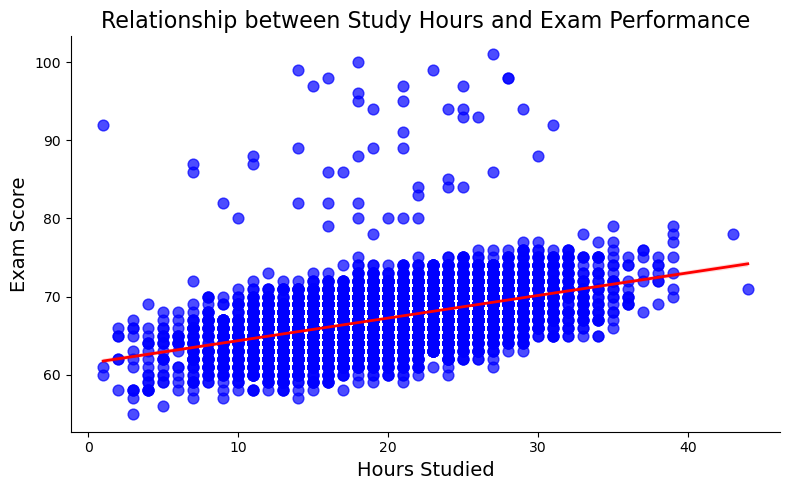

In [27]:
plt.figure(figsize=(8, 5))
sns.regplot(x='Hours_Studied', y='Exam_Score', data=df,scatter_kws={'s': 60, 'color': 'blue', 'alpha': 0.7},line_kws={'color': 'red', 'linewidth': 2})
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.title('Relationship between Study Hours and Exam Performance', fontsize=16)
sns.despine()
plt.tight_layout()
plt.show()

# Train Test Split

In [28]:
# Target variable
y = df_encoded['Exam_Score']

# Features
X = df_encoded.drop(columns=['Exam_Score'])

#Train/Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Scale numerical features (StandardScaler for normalization)
num_features = [
    'Hours_Studied', 'Attendance', 'Sleep_Hours',
    'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity'
]
scaler = StandardScaler()  # Initialize scaler
X_train[num_features] = scaler.fit_transform(X_train[num_features])  # Fit and transform train
X_test[num_features] = scaler.transform(X_test[num_features])  # Transform test

# Modeling

In [30]:
# Train Linear Regression Model (Full Features)
lr = LinearRegression()  # Initialize model
lr.fit(X_train, y_train)  # Fit on training data

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
# Make Predictions
y_pred = lr.predict(X_test)  # Predict on test set

# Visualize Predictions

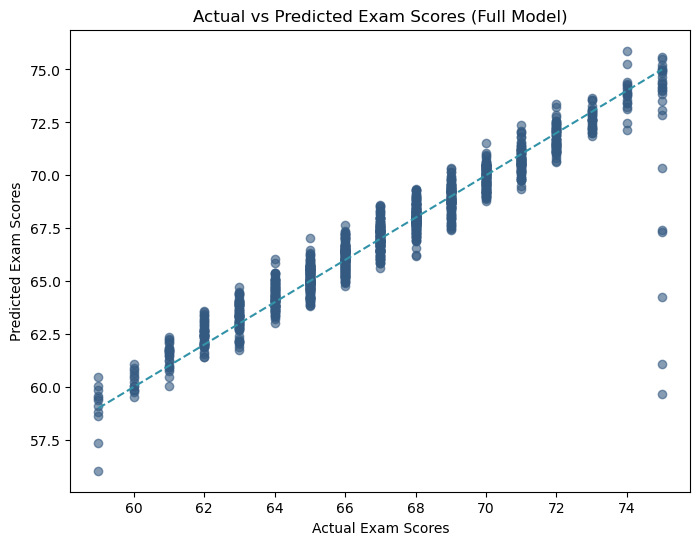

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='#355a81', alpha=0.6)  # Scatter of actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='#3293a8', linestyle='--')
plt.xlabel('Actual Exam Scores') 
plt.ylabel('Predicted Exam Scores')  
plt.title('Actual vs Predicted Exam Scores (Full Model)') 
plt.show()  # Display

# Evaluate Model Performance

In [33]:
mse = mean_squared_error(y_test, y_pred)          # Mean Squared Error
rmse = np.sqrt(mse)                                # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)         # Mean Absolute Error
r2 = r2_score(y_test, y_pred)                     # R-squared
print(f'MSE: {mse}') 
print(f'RMSE: {rmse}')  
print(f'R² Score: {r2}')  
print(f"The model explains {r2*100:.2f}% of the variance in scores.") 

MSE: 0.9428335528068584
RMSE: 0.9709961651864844
R² Score: 0.916364409046662
The model explains 91.64% of the variance in scores.


# Overfitting check: Compare train and test metrics

In [34]:
y_train_pred = lr.predict(X_train)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"\n--- Overfitting Check ---")
print(f"Train RMSE: {rmse_train:.2f}, R²: {r2_train:.2f}")
print(f"Test RMSE: {rmse:.2f}, R²: {r2:.2f}")

if abs(r2_train - r2) > 0.10 or rmse_train < (0.75 * rmse):
    print("Warning: The model may be overfitting (train performance much better than test).")
else:
    print("No clear signs of overfitting: train and test performance are similar.")



--- Overfitting Check ---
Train RMSE: 1.05, R²: 0.90
Test RMSE: 0.97, R²: 0.92
No clear signs of overfitting: train and test performance are similar.


# Polynomial Regression

In [35]:
poly = PolynomialFeatures(degree=2, include_bias=False) 
X_train_poly = poly.fit_transform(X_train)   
X_test_poly  = poly.transform(X_test)        

poly_reg = LinearRegression()

poly_reg.fit(X_train_poly, y_train)

# Make Predictions
y_pred_poly = poly_reg.predict(X_test_poly)

In [36]:
mse_poly  = mean_squared_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)
mae_poly  = mean_absolute_error(y_test, y_pred_poly)
r2_poly   = r2_score(y_test, y_pred_poly)

print(f"Polynomial MSE : {mse_poly:.4f}")
print(f"Polynomial RMSE: {rmse_poly:.4f}")
print(f"Polynomial MAE : {mae_poly:.4f}")
print(f"Polynomial R²  : {r2_poly:.4f}")
print(f"Number of features after Polynomial: {X_train_poly.shape[1]}")

Polynomial MSE : 0.6783
Polynomial RMSE: 0.8236
Polynomial MAE : 0.3843
Polynomial R²  : 0.9398
Number of features after Polynomial: 209


# Visualize Predictions

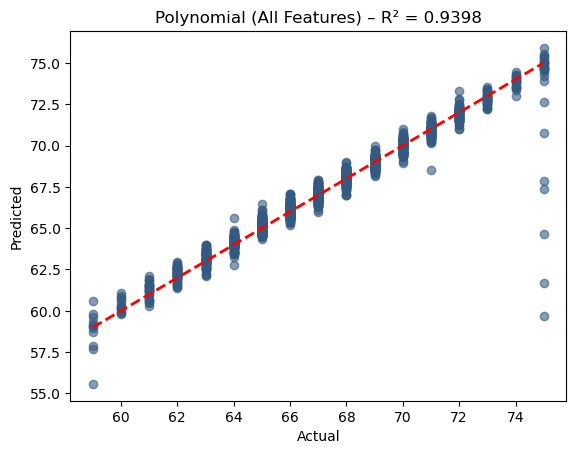

In [37]:
plt.scatter(y_test, y_pred_poly, alpha=0.6, color='#355a81')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Polynomial (All Features) – R² = {r2_poly:.4f}')
plt.show()

# Compare between linear Regression and Polynomial

In [38]:
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial (Deg 2)'],
    'MSE': [f"{mse:.4f}", f"{mse_poly:.4f}"],
    'RMSE': [f"{rmse:.4f}", f"{rmse_poly:.4f}"],
    'MAE': [f"{mae:.4f}", f"{mae_poly:.4f}"],
    'R²': [f"{r2:.4f}", f"{r2_poly:.4f}"]
})

print(comparison.to_string(index=False))

             Model    MSE   RMSE    MAE     R²
 Linear Regression 0.9428 0.9710 0.5643 0.9164
Polynomial (Deg 2) 0.6783 0.8236 0.3843 0.9398


# Visualize the Compare

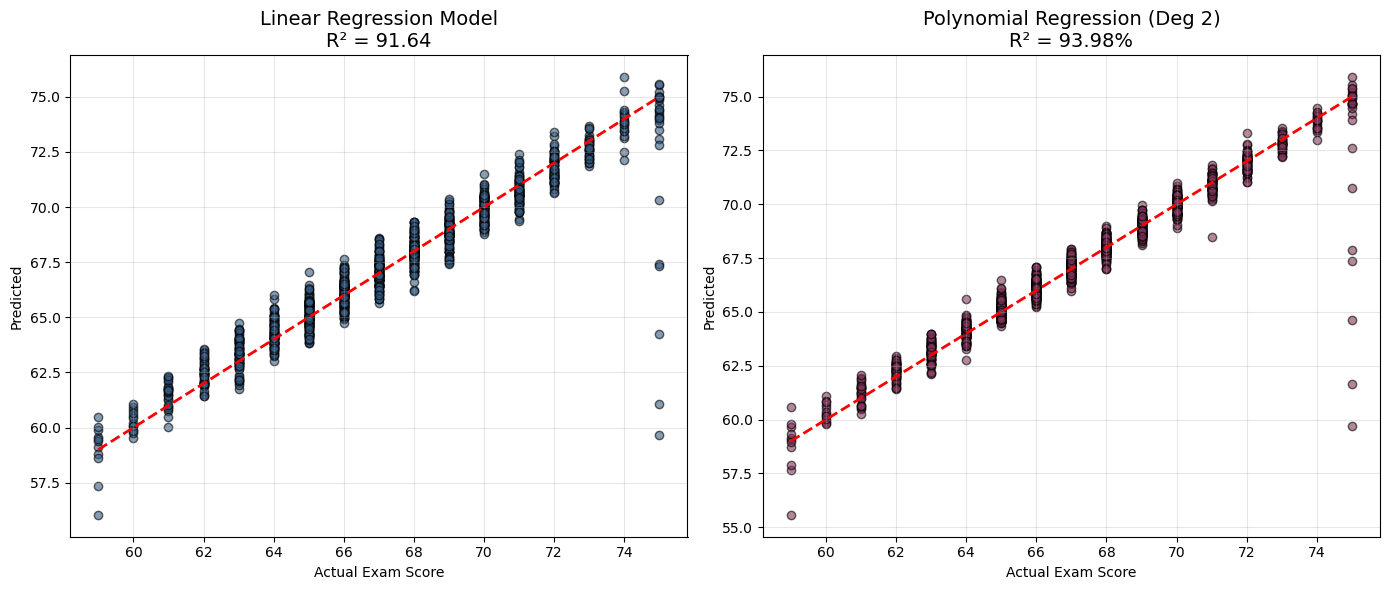

In [39]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Linear
ax1.scatter(y_test, y_pred, alpha=0.6, color='#355a81', edgecolor='k')
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax1.set_title(f'Linear Regression Model\nR² = {r2*100:.2f}', fontsize=14)
ax1.set_xlabel('Actual Exam Score')
ax1.set_ylabel('Predicted')
ax1.grid(True, alpha=0.3)

# Polynomial
ax2.scatter(y_test, y_pred_poly, alpha=0.6, color='#81355a', edgecolor='k')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax2.set_title(f'Polynomial Regression (Deg 2)\nR² = {r2_poly*100:.2f}%', fontsize=14)
ax2.set_xlabel('Actual Exam Score')
ax2.set_ylabel('Predicted')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('linear_vs_polynomial_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
# Select Best Model

In [41]:
# -------------------------------------------------
# SELECT THE BEST MODEL (Linear vs Polynomial)
# -------------------------------------------------
print("\n" + "="*50)
print("   MODEL COMPARISON & SELECTION")
print("="*50)

# R² scores (already calculated in your cell)
r2_linear      = r2          # from LinearRegression
r2_polynomial  = r2_poly     # from PolynomialFeatures + LinearRegression

print(f"Linear Regression      R² = {r2_linear:.4f}")
print(f"Polynomial (Deg 2)     R² = {r2_polynomial:.4f}")

# Choose the model with higher R²
if r2_polynomial > r2_linear:
    best_model_name = "Polynomial (Degree 2)"
    best_model      = poly_reg          # fitted model on polynomial features
    best_poly       = poly              # PolynomialFeatures transformer
    best_r2         = r2_polynomial
    use_poly        = True
else:
    best_model_name = "Linear Regression"
    best_model      = lr                # fitted linear model
    best_poly       = None
    best_r2         = r2_linear
    use_poly        = False

print(f"\nBest model selected: **{best_model_name}** (R² = {best_r2:.4f})")


   MODEL COMPARISON & SELECTION
Linear Regression      R² = 0.9164
Polynomial (Deg 2)     R² = 0.9398

Best model selected: **Polynomial (Degree 2)** (R² = 0.9398)


# Save the models

In [42]:
# -------------------------------------------------
# SAVE BEST MODEL + PREPROCESSING + FEATURE COLUMNS
# -------------------------------------------------
import joblib
import os

# Create folder
os.makedirs("model_artifacts", exist_ok=True)

# Save scaler
joblib.dump(scaler, "model_artifacts/scaler.pkl")

# Save feature column order (CRITICAL for Streamlit)
joblib.dump(X.columns.tolist(), "model_artifacts/feature_columns.pkl")

# Save best model and poly (if used)
if use_poly:
    joblib.dump(best_poly, "model_artifacts/poly_features.pkl")
    joblib.dump(best_model, "model_artifacts/best_model.pkl")
    print("Saved: Polynomial model + poly features + scaler + feature columns")
else:
    joblib.dump(best_model, "model_artifacts/best_model.pkl")
    print("Saved: Linear model + scaler + feature columns")

print("\nAll files saved in: model_artifacts/")
print("   - scaler.pkl")
print("   - feature_columns.pkl")
if use_poly:
    print("   - poly_features.pkl")
print("   - best_model.pkl")

Saved: Polynomial model + poly features + scaler + feature columns

All files saved in: model_artifacts/
   - scaler.pkl
   - feature_columns.pkl
   - poly_features.pkl
   - best_model.pkl
